In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix



In [ ]:
from google.colab import files
import pandas as pd

# Upload the file
uploaded = files.upload()

# Load the uploaded file into a DataFrame
for filename in uploaded.keys():
    print(f"You uploaded: {filename}")
    data = pd.read_csv(filename)
    print(data.head())


Saving goldstock.csv to goldstock.csv
You uploaded: goldstock.csv
   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1


In [ ]:
# Checking the column names and types
print(data.info())

# Checking for missing values
print(data.isnull().sum())

# Getting basic statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB
None
Unnamed: 0    0
Date          0
Close         0
Volume        0
Open          0
High          0
Low           0
dtype: int64
        Unnamed: 0        Close         Volume         Open         High  \
count  2511.000000  2511.000000    2511.000000  2511.000000  2511.000000   
mean   1260.792911  1498.726085  185970.770609  1498.725528  1508.451454   
std     729.262879   298.824811   97600.769382   299.118187   301.262244   
min       0.000000  1049.60

In [ ]:
# Calculating percentage change in the Close price
data['Close_pct_change'] = data['Close'].pct_change()

# Defining a crash as a >5% drop in Close price
data['Crash'] = (data['Close_pct_change'] < -0.05).astype(int)

# Dropping NaN rows created by pct_change
data = data.dropna()

# Checking the distribution of the target
print(data['Crash'].value_counts())


Crash
0    2508
1       2
Name: count, dtype: int64


In [ ]:
# Defining features and target
X = data[['Close', 'Volume', 'Open', 'High', 'Low']]
y = data['Crash']


In [ ]:
corr_matrix = data[['Close', 'Volume', 'Open', 'High', 'Low']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show

In [ ]:
features = ['Close', 'Volume', 'Open', 'High', 'Low']

plt.figure(figsize=(12, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Initializing and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[502]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       502

    accuracy                           1.00       502
   macro avg       1.00      1.00      1.00       502
weighted avg       1.00      1.00      1.00       502



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1180: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


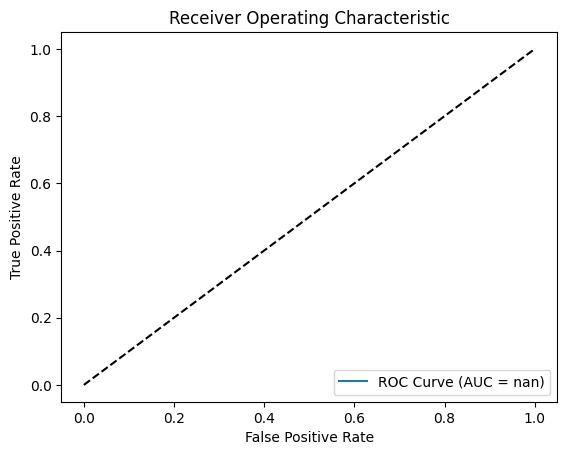

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculating probabilities for the ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Predicting crash probabilities for the test set
data['Crash_Probability'] = model.predict_proba(X)[:, 1]

# Adding model predictions to the dataset
data['Crash_Prediction'] = model.predict(X)


In [ ]:
# column to track strategy actions
data['Investment_Action'] = data['Crash_Prediction'].apply(
    lambda x: 'Safe Assets' if x == 1 else 'Growth Investments'
)


In [ ]:
# Calculating daily returns for growth investments
data['Daily_Returns'] = data['Close'].pct_change()

# Simulating returns based on the strategy
initial_investment = 10000  # Example: $10,000 starting capital
data['Portfolio_Value'] = initial_investment
portfolio = initial_investment

for i in range(1, len(data)):
    if data.iloc[i]['Investment_Action'] == 'Safe Assets':
        # No change in portfolio during crashes
        data.loc[data.index[i], 'Portfolio_Value'] = portfolio
    else:
        # Apply daily returns during growth investment periods
        portfolio *= (1 + data.iloc[i]['Daily_Returns'])
        data.loc[data.index[i], 'Portfolio_Value'] = portfolio


<ipython-input-31-c104df9eb56d>:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9925.306687772061' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data.index[i], 'Portfolio_Value'] = portfolio


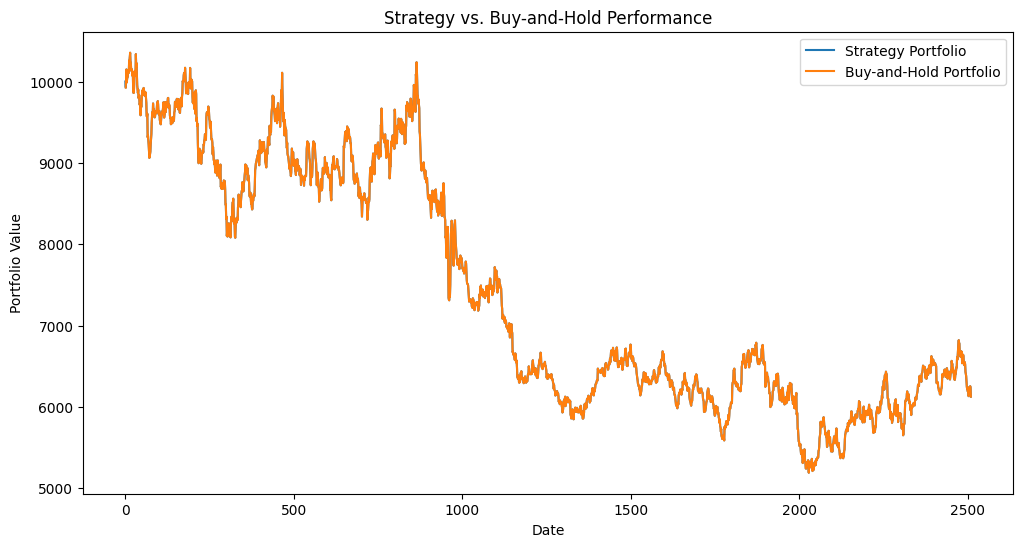

In [ ]:
# Simulating a buy-and-hold portfolio
data['Buy_and_Hold'] = initial_investment * (1 + data['Daily_Returns']).cumprod()

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data['Portfolio_Value'], label='Strategy Portfolio')
plt.plot(data['Buy_and_Hold'], label='Buy-and-Hold Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Strategy vs. Buy-and-Hold Performance')
plt.legend()
plt.show()


In [ ]:
# Calculating key metrics
strategy_cumulative_return = (data['Portfolio_Value'].iloc[-1] / initial_investment) - 1
buy_and_hold_cumulative_return = (data['Buy_and_Hold'].iloc[-1] / initial_investment) - 1

print(f"Strategy Cumulative Return: {strategy_cumulative_return:.2%}")
print(f"Buy-and-Hold Cumulative Return: {buy_and_hold_cumulative_return:.2%}")


Strategy Cumulative Return: -38.73%
Buy-and-Hold Cumulative Return: -38.73%


In [ ]:
def investment_bot():
    print("Welcome to the Investment Bot!")
    print("I will help you understand market predictions and suggest investment strategies.\n")

    while True:
        print("\nOptions:")
        print("1. Explain current market prediction")
        print("2. Recommend investment action")
        print("3. Show historical strategy performance")
        print("4. Exit")

        choice = input("Choose an option (1-4): ")

        if choice == "1":
            # Example prediction explanation
            latest_prediction = data['Crash_Prediction'].iloc[-1]
            probability = data['Crash_Probability'].iloc[-1]
            if latest_prediction == 1:
                print(f"\nMarket Prediction: Crash likely (Probability: {probability:.2%}).")
            else:
                print(f"\nMarket Prediction: Stable market (Probability: {probability:.2%}).")

        elif choice == "2":
            # Example recommendation
            latest_action = data['Investment_Action'].iloc[-1]
            print(f"\nRecommended Action: {latest_action}")

        elif choice == "3":
            # Show final portfolio value and comparison
            strategy_value = data['Portfolio_Value'].iloc[-1]
            buy_and_hold_value = data['Buy_and_Hold'].iloc[-1]
            print(f"\nStrategy Final Portfolio Value: ${strategy_value:,.2f}")
            print(f"Buy-and-Hold Final Portfolio Value: ${buy_and_hold_value:,.2f}")

        elif choice == "4":
            print("\nThank you for using the Investment Bot! Goodbye!")
            break

        else:
            print("\nInvalid option. Please choose again.")


In [ ]:
investment_bot()


Welcome to the Investment Bot!
I will help you understand market predictions and suggest investment strategies.


Options:
1. Explain current market prediction
2. Recommend investment action
3. Show historical strategy performance
4. Exit
Choose an option (1-4): 1

Market Prediction: Stable market (Probability: 0.09%).

Options:
1. Explain current market prediction
2. Recommend investment action
3. Show historical strategy performance
4. Exit
Choose an option (1-4): 2

Recommended Action: Growth Investments

Options:
1. Explain current market prediction
2. Recommend investment action
3. Show historical strategy performance
4. Exit
Choose an option (1-4): 3

Strategy Final Portfolio Value: $6,126.83
Buy-and-Hold Final Portfolio Value: $6,126.83

Options:
1. Explain current market prediction
2. Recommend investment action
3. Show historical strategy performance
4. Exit
Choose an option (1-4): 1

Market Prediction: Stable market (Probability: 0.09%).

Options:
1. Explain current market pr